# Phase 2 Project

## Overview

A company that buys houses to flip and resell is interested in finding out what pre-existine features of houses are likely to lead to a higher sale price. Since they plan on "flipping" the house, or adding their own renovations, they aren't as interested in details such as the overall condition of the house and are more interested in things such as location, how big of a lot the house is built on, etc.

## Business Understanding

The features of the data from a housing dataset that I will be looking at, and comparing to the sale price of the houses, include number of bedrooms, number of bathrooms, square footage of the living area, square footage of the lot, number of floors, whether the house is on a waterfront, whether the house is adjacent to a green belt, whether the house has traffic noise or other nuisances, and the quality of the view of the house. 
After performing exploratory data analysis and determining which of these factors seem to relate to sale price, I will narrow down my efforts to determine which of those factors are the best predictors of sale price.

## Data Understanding

I begin by importing the necessary modules and the dataset I will be using, which includes housing data for King County.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import math

In [17]:
data = pd.read_csv('Data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Next, I try to find out more about the data and narrow down the dataframe I will be using to only include the necessary columns.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Data Preparation

In [19]:
data.corr()["price"]

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

Of the numeric variables in the data, it looks like the features most correlated with price are sqft_living, bathrooms, and bedrooms. 

In [20]:
data_num = data.copy().select_dtypes("number")
data_num.dropna(inplace=True)
data_num

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006,0,47.449490,-122.18908


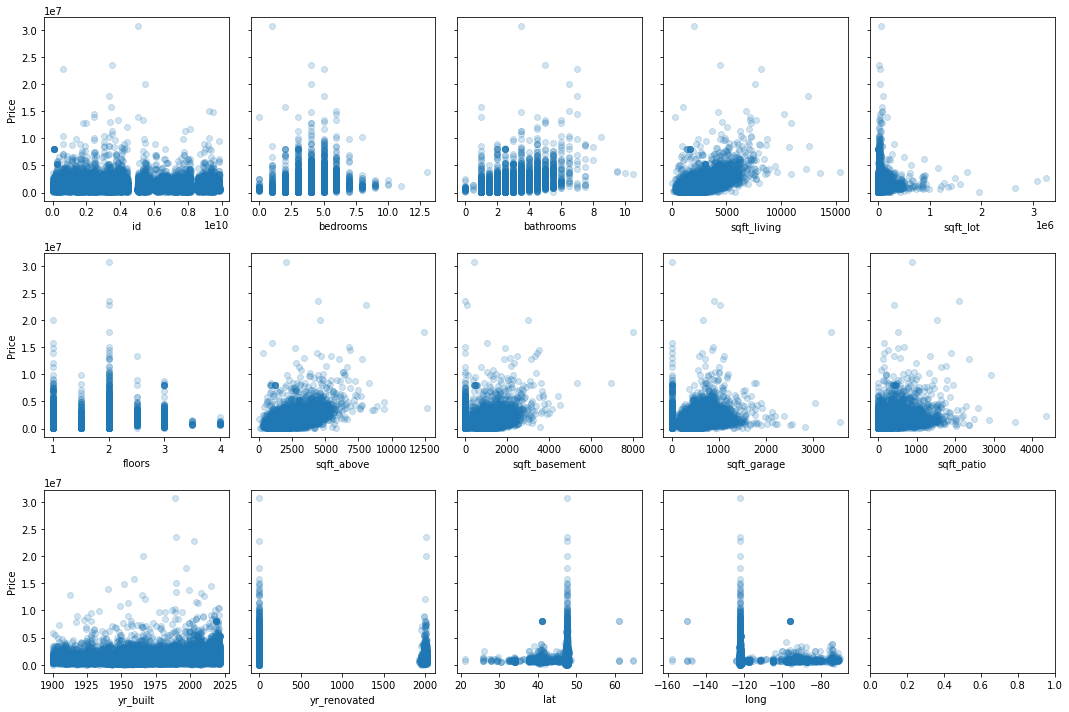

In [21]:
y = data_num["price"]
X = data_num.drop("price", axis=1)


fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 5
    col = i % 5
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price")

fig.tight_layout()

The only numerical variable here that appears to have a positive linear relationship with price is sqft_living. As the feature most correlated with price and the one with the strongest linear relationship, sqft_living seems to  be a good variable to build a baseline model with to then compare other variables to.

In [22]:
data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system']]
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,heat_source,sewer_system
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Gas,PUBLIC
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Oil,PUBLIC
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Gas,PUBLIC
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Gas,PUBLIC
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Electricity,PUBLIC


In [23]:
y = data[['price']]
X_baseline = data[['sqft_living']]

In [24]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        19:55:25   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

/Users/nicolemichaud/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


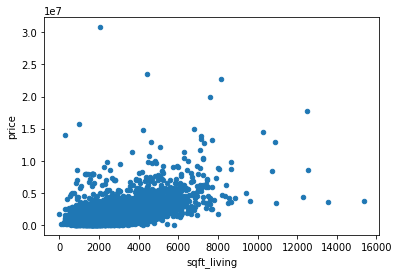

In [25]:
data.plot.scatter(x="sqft_living", y="price");

## Modeling

### Numeric data:

In [30]:
X_all = data.drop(['price'], axis=1).select_dtypes("number")
X_all

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,4,1.0,1180,7140,1.0
1,5,2.5,2770,6703,1.0
2,6,2.0,2880,6156,1.0
3,3,3.0,2160,1400,2.0
4,2,2.0,1120,758,2.0
...,...,...,...,...,...
30150,5,2.0,1910,4000,1.5
30151,3,2.0,2020,5800,2.0
30152,3,2.0,1620,3600,1.0
30153,3,2.5,2570,2889,2.0


Next, I begin investigating the variables in the dataset to determine which ones have a relationship with the target variable. I first create a model with price as the dependant variable and the other (numeric) columns as the independant variables to get a better idea of which ones seem to have stronger relationships.

In [31]:
model = sm.OLS(y, sm.add_constant(X_all))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     3844.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        20:20:59   Log-Likelihood:            -4.4866e+05
No. Observations:               30155   AIC:                         8.973e+05
Df Residuals:                   30149   BIC:                         8.974e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.523e+05   1.75e+04     14.391      

### Categorical data:

In [18]:
y = data["price"]
X_wf = data[["waterfront"]]
X_gb = data[["greenbelt"]]
X_nu = data[["nuisance"]]
X_vw = data[["view"]]

In [19]:
waterfront_X = pd.get_dummies(X_wf, columns=["waterfront"], drop_first=True)
waterfront_X

,waterfront_YES
0,0
1,0
2,0
3,0
4,0
...,...
30150,0
30151,0
30152,0
30153,0


In [20]:
waterfront_model = sm.OLS(y, sm.add_constant(waterfront_X))
wf_results = waterfront_model.fit()

print(wf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1719.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        19:21:43   Log-Likelihood:            -4.5526e+05
No. Observations:               30155   AIC:                         9.105e+05
Df Residuals:                   30153   BIC:                         9.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.081e+06   5064.675    213.

In [21]:
greenbelt_X = pd.get_dummies(X_gb, columns=["greenbelt"], drop_first=True)
greenbelt_X

,greenbelt_YES
0,0
1,0
2,0
3,0
4,0
...,...
30150,0
30151,0
30152,0
30153,0


In [22]:
import statsmodels.api as sm

greenbelt_model = sm.OLS(y, sm.add_constant(greenbelt_X))
gb_results = greenbelt_model.fit()

print(gb_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.77e-32
Time:                        19:21:45   Log-Likelihood:            -4.5603e+05
No. Observations:               30155   AIC:                         9.121e+05
Df Residuals:                   30153   BIC:                         9.121e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.099e+06   5217.319    210.570

In [23]:
nuisance_X = pd.get_dummies(X_nu, columns=["nuisance"], drop_first=True)
nuisance_X

,nuisance_YES
0,0
1,1
2,0
3,0
4,1
...,...
30150,0
30151,0
30152,1
30153,0


In [24]:
import statsmodels.api as sm

nuisance_model = sm.OLS(y, sm.add_constant(nuisance_X))
nu_results = nuisance_model.fit()

print(nu_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.021
Date:                Mon, 22 May 2023   Prob (F-statistic):             0.0449
Time:                        19:21:46   Log-Likelihood:            -4.5609e+05
No. Observations:               30155   AIC:                         9.122e+05
Df Residuals:                   30153   BIC:                         9.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.104e+06   5681.127    194.288   

In [25]:
X_vw['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [26]:
view_X = pd.get_dummies(X_vw, columns=["view"], drop_first=True)
view_X

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
30150,0,0,0,1
30151,0,1,0,0
30152,0,0,0,1
30153,0,0,0,1


In [27]:
import statsmodels.api as sm

view_model = sm.OLS(y, sm.add_constant(view_X))
vw_results = view_model.fit()

print(vw_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1001.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        19:21:47   Log-Likelihood:            -4.5421e+05
No. Observations:               30155   AIC:                         9.084e+05
Df Residuals:                   30150   BIC:                         9.085e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.452e+06   1.92e+04     75.

For each of these categorical variables:

The model with waterfront explains about 5 percent of the variance in price and the F-statistic is statistically significant. Compared to houses that are not on a waterfront, we see a price increase of about 1,601,000 dollars for houses that are on a waterfront.

The model with greenbelt explains about 0.5 percent of the variance in price and the F-statistic is statistically significant. Compared to houses that are not near a greenbelt, we see a price increase of about 387,100 dollars for houses that are.

The model with nuisance explains 0 percent of the variance in price and it is statistically significant. This may indicate that this model is not suited for linear regression.

The model with view explains about 11.7 percent of the variance in price and it has an F-statistic of 0, so it is statistically significant. Compared to houses with an average view, we see a price increase of about 1,542,000 dollars for an excellent view, about 284,400 dollars for a good view, about 290,100 dollars for a fair view, and a decrease of about 433,400 dollars for no view.
 

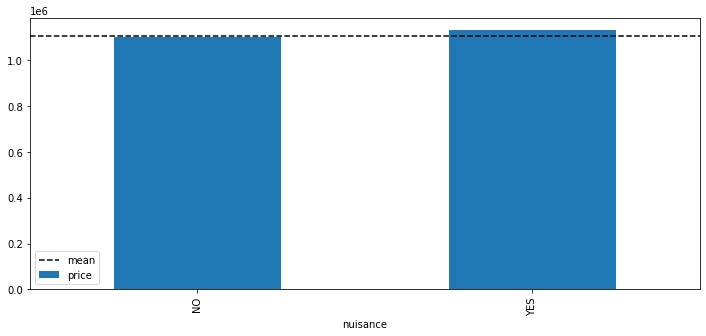

In [31]:
fig, ax = plt.subplots(figsize=(12,5))
data.groupby("nuisance").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=data["price"].mean(), label="mean", color="black", linestyle="--")
ax.legend();

In [117]:
nu_x = nuisance_X[['nuisance_YES']]
ln_x = np.log(nu_x + 1)

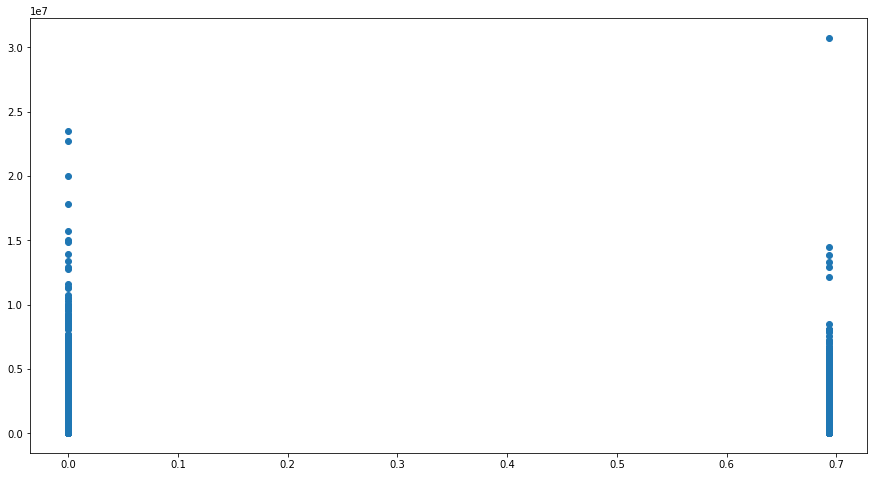

In [118]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x=ln_x, y=y)

In [122]:
nu_model = sm.OLS(y, sm.add_constant(nuisance_X["nuisance_YES"]))
nu_results = nu_model.fit()
nu_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.021
Date:                Mon, 22 May 2023   Prob (F-statistic):             0.0449
Time:                        20:46:40   Log-Likelihood:            -4.5609e+05
No. Observations:               30155   AIC:                         9.122e+05
Df Residuals:                   30153   BIC:                         9.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.104e+06   5681.127    194.288      0.000    1.09e+06    1.11e+06
nuisance_YES  2.727e+04   1.36e+04      2.005      0.045     614.521    5.39e+04
==============================================================================
Omnibus:                    37941.688   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14348330.387
Skew:                           6.598   Prob(JB):                         0.00
Kurtosis:                     109.045   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For some reason it appears that houses with nuisance have a slightly higher average price than those without which is unexpected. However, this model does not seem to be a good predictor of price anyway.

Of the categorical variables, the ones that appear to be the best predictors of price are view and waterfront.
Of the numeric variables, the one that appears to be the best predictor is sqft_living.

## Regression Results

Next steps: QQ Plot? What goes in results vs model section? add variables together/interaction variables?? Add condition+year renovated vars to see potential of profit

## Conclusion